In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("../Data/access_control_data.csv")

In [3]:
data.head()
sns.set_style('darkgrid')

In [4]:
data.columns

Index(['Txhash', 'Blockno', 'UnixTimestamp', 'DateTime', 'From', 'To',
       'ContractAddress', 'Value_IN(ETH)', 'Value_OUT(ETH)',
       'CurrentValue @ $0/Eth', 'TxnFee(ETH)', 'TxnFee(USD)',
       'Historical $Price/Eth', 'Status', 'ErrCode', 'Method'],
      dtype='object')

In [5]:
data.isnull()

,Txhash,Blockno,UnixTimestamp,DateTime,From,To,ContractAddress,Value_IN(ETH),Value_OUT(ETH),CurrentValue @ $0/Eth,TxnFee(ETH),TxnFee(USD),Historical $Price/Eth,Status,ErrCode,Method
0,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,False
1,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,False
2,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,False
3,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,False
4,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
422,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,False
423,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,False
424,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,False


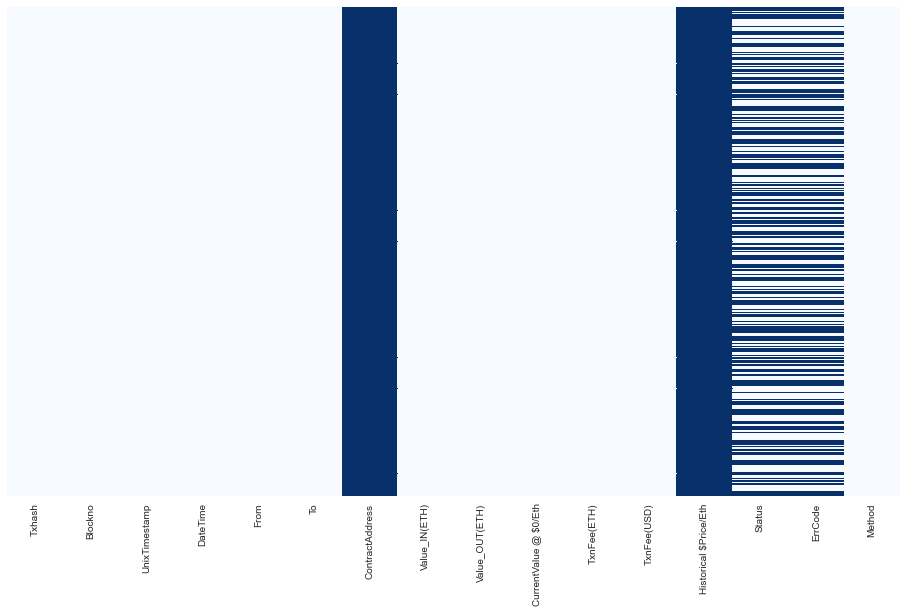

In [6]:
plt.subplots(figsize = (16, 9))
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [7]:
data = data.drop(axis = 1, columns = ['ContractAddress', 'Value_IN(ETH)', 'Value_OUT(ETH)',
                                      'CurrentValue @ $0/Eth', 'TxnFee(USD)',
                                      'Historical $Price/Eth', 'Historical $Price/Eth', 'ErrCode',
                                      'Txhash', 'DateTime'])

In [8]:
data.count()

Blockno          426
UnixTimestamp    426
From             426
To               425
TxnFee(ETH)      426
Status           219
Method           426
dtype: int64

In [9]:
data['Status'] = data['Status'].isnull()

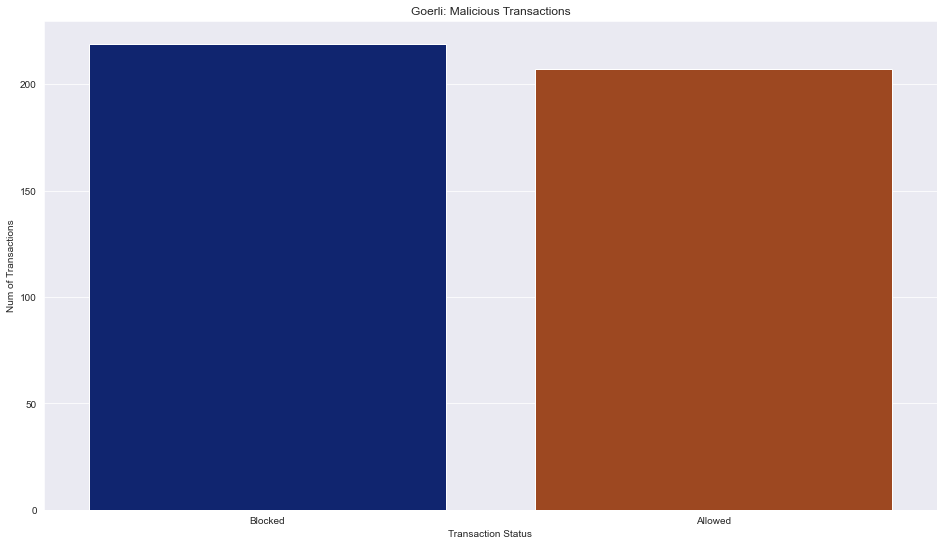

In [10]:
plt.subplots(figsize = (16, 9))
sns.countplot(x = 'Status', data = data, palette = 'dark')
plt.xticks([0, 1], ['Blocked', 'Allowed'])
plt.xlabel('Transaction Status')
plt.ylabel('Num of Transactions')
plt.title('Goerli: Malicious Transactions')
plt.savefig('../Graphs/Goerli-Malicious_Transactions.png')
plt.show()

In [11]:
data

,Blockno,UnixTimestamp,From,To,TxnFee(ETH),Status,Method
0,6053921,1639985054,0xbb66ef34814f0613a3b738288fe55553a69c44ba,NaN,0.002644,True,0x60806040
1,6060549,1640084487,0x6a09436f3cb7c3e871071033aba967327499b9d4,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000551,True,0x7818055e
2,6065923,1640165159,0x6a09436f3cb7c3e871071033aba967327499b9d4,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000471,True,0x7818055e
3,6099690,1640671862,0x6a09436f3cb7c3e871071033aba967327499b9d4,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000414,True,0x7818055e
4,6099691,1640671877,0x6a09436f3cb7c3e871071033aba967327499b9d4,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000365,False,0x7818055e
...,...,...,...,...,...,...,...
421,6099810,1640673662,0x6a09436f3cb7c3e871071033aba967327499b9d4,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000365,False,0x7818055e
422,6099810,1640673662,0x93e92a2bc0c66a2887ecf5c918fbbd622491ed23,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000395,True,0x7818055e
423,6099810,1640673662,0x138b9ebec6dcf3a5293fd6f5846ccbfe7a9e856a,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000418,True,0x7818055e
424,6099810,1640673662,0xa72e420605fd940b860c493263ce891d434782cb,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000369,True,0x7818055e


In [12]:
min_time = min(data['UnixTimestamp'][3:])
min_time

1640671862

In [13]:
def reset_time(columns):
    return columns[0] - min_time

In [14]:
data['UnixTimestamp'] = data[['UnixTimestamp']].apply(reset_time, axis = 1)

In [15]:
data.head(10)

,Blockno,UnixTimestamp,From,To,TxnFee(ETH),Status,Method
0,6053921,-686808,0xbb66ef34814f0613a3b738288fe55553a69c44ba,NaN,0.002644,True,0x60806040
1,6060549,-587375,0x6a09436f3cb7c3e871071033aba967327499b9d4,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000551,True,0x7818055e
2,6065923,-506703,0x6a09436f3cb7c3e871071033aba967327499b9d4,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000471,True,0x7818055e
3,6099690,0,0x6a09436f3cb7c3e871071033aba967327499b9d4,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000414,True,0x7818055e
4,6099691,15,0x6a09436f3cb7c3e871071033aba967327499b9d4,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000365,False,0x7818055e
5,6099692,30,0x6a09436f3cb7c3e871071033aba967327499b9d4,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000365,True,0x7818055e
6,6099693,45,0x6a09436f3cb7c3e871071033aba967327499b9d4,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000365,False,0x7818055e
7,6099697,105,0xa72e420605fd940b860c493263ce891d434782cb,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000421,True,0x7818055e
8,6099697,105,0xa6e799871576a4337bb1ebf8e0cfe348209a9a1b,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000495,True,0x7818055e
9,6099697,105,0x138b9ebec6dcf3a5293fd6f5846ccbfe7a9e856a,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000495,True,0x7818055e


In [16]:
data = data.rename(columns = {'UnixTimestamp': 'Time'})

In [17]:
data = data[3:]
data

,Blockno,Time,From,To,TxnFee(ETH),Status,Method
3,6099690,0,0x6a09436f3cb7c3e871071033aba967327499b9d4,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000414,True,0x7818055e
4,6099691,15,0x6a09436f3cb7c3e871071033aba967327499b9d4,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000365,False,0x7818055e
5,6099692,30,0x6a09436f3cb7c3e871071033aba967327499b9d4,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000365,True,0x7818055e
6,6099693,45,0x6a09436f3cb7c3e871071033aba967327499b9d4,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000365,False,0x7818055e
7,6099697,105,0xa72e420605fd940b860c493263ce891d434782cb,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000421,True,0x7818055e
...,...,...,...,...,...,...,...
421,6099810,1800,0x6a09436f3cb7c3e871071033aba967327499b9d4,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000365,False,0x7818055e
422,6099810,1800,0x93e92a2bc0c66a2887ecf5c918fbbd622491ed23,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000395,True,0x7818055e
423,6099810,1800,0x138b9ebec6dcf3a5293fd6f5846ccbfe7a9e856a,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000418,True,0x7818055e
424,6099810,1800,0xa72e420605fd940b860c493263ce891d434782cb,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000369,True,0x7818055e


In [18]:
data.reset_index()

,index,Blockno,Time,From,To,TxnFee(ETH),Status,Method
0,3,6099690,0,0x6a09436f3cb7c3e871071033aba967327499b9d4,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000414,True,0x7818055e
1,4,6099691,15,0x6a09436f3cb7c3e871071033aba967327499b9d4,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000365,False,0x7818055e
2,5,6099692,30,0x6a09436f3cb7c3e871071033aba967327499b9d4,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000365,True,0x7818055e
3,6,6099693,45,0x6a09436f3cb7c3e871071033aba967327499b9d4,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000365,False,0x7818055e
4,7,6099697,105,0xa72e420605fd940b860c493263ce891d434782cb,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000421,True,0x7818055e
...,...,...,...,...,...,...,...,...
418,421,6099810,1800,0x6a09436f3cb7c3e871071033aba967327499b9d4,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000365,False,0x7818055e
419,422,6099810,1800,0x93e92a2bc0c66a2887ecf5c918fbbd622491ed23,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000395,True,0x7818055e
420,423,6099810,1800,0x138b9ebec6dcf3a5293fd6f5846ccbfe7a9e856a,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000418,True,0x7818055e
421,424,6099810,1800,0xa72e420605fd940b860c493263ce891d434782cb,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000369,True,0x7818055e


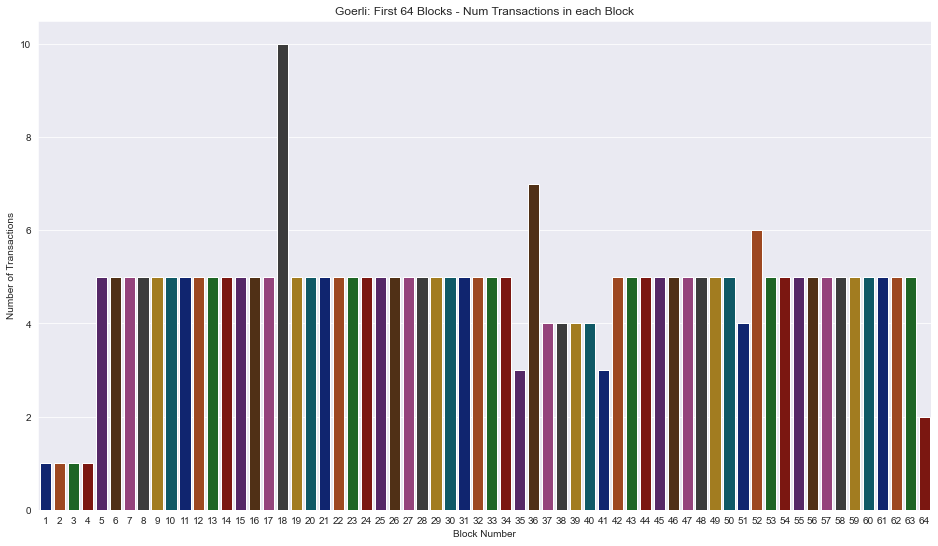

In [19]:
plt.subplots(figsize = (16, 9))
sns.set_style('darkgrid')
sns.countplot(x = 'Time', data = data[:300], palette = 'dark')
plt.xlabel('Block Number')
plt.ylabel('Number of Transactions')
plt.title('Goerli: First 64 Blocks - Num Transactions in each Block')
plt.xticks(range(64), range(1, 101))
plt.savefig('../Graphs/Goerli-Transactions_Per_Block.png')
plt.show()

In [20]:
test = data[['Time', 'Blockno']]
test.drop_duplicates(subset = 'Time', inplace = True)

C:\Users\Rohan\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [21]:
block_min = min(test['Blockno'])

def reset_block(columns):
    return columns[0] - block_min

test['Blockno'] = test[['Blockno']].apply(reset_block, axis = 1)
test1 = test['Time'].diff(1)

<ipython-input-21-2b72c088bbb0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Blockno'] = test[['Blockno']].apply(reset_block, axis = 1)


In [22]:
test1 = test1.dropna()
test1 = test1.reset_index()
test1 = test1['Time']

In [23]:
test1

0     15.0
1     15.0
2     15.0
3     60.0
4     15.0
      ... 
79    15.0
80    15.0
81    15.0
82    15.0
83    15.0
Name: Time, Length: 84, dtype: float64

In [24]:
for index in range(len(test1)):
    if test1[index] > 60:
        del test1[index]

In [25]:
test1

0     15.0
1     15.0
2     15.0
3     60.0
4     15.0
      ... 
79    15.0
80    15.0
81    15.0
82    15.0
83    15.0
Name: Time, Length: 82, dtype: float64

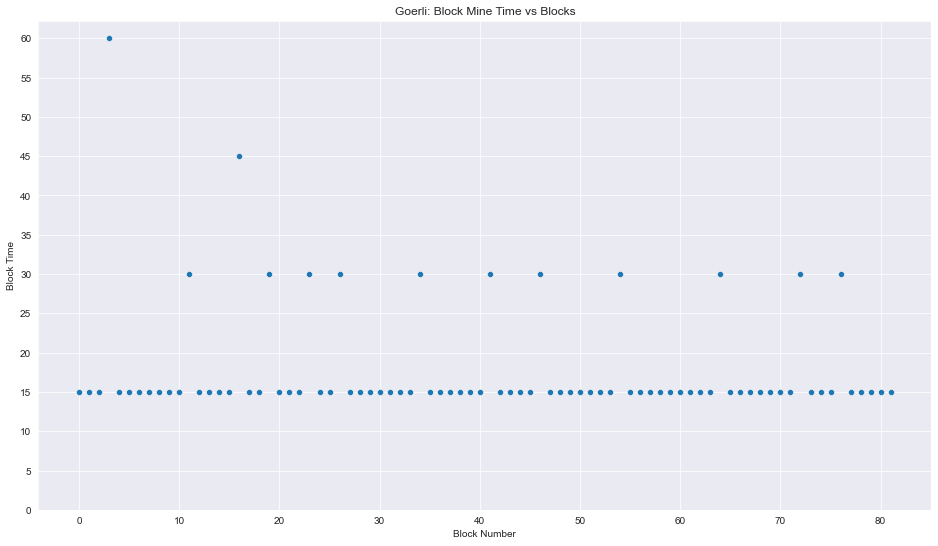

In [26]:
plt.subplots(figsize = (16, 9))
a = sns.scatterplot(x = range(len(test1)), y = test1)
a.set_yticks(range(0, 61, 5))
plt.ylabel('Block Time')
plt.xlabel('Block Number')
plt.title('Goerli: Block Mine Time vs Blocks')
plt.savefig('../Graphs/Goerli-Latency.png')
plt.show()

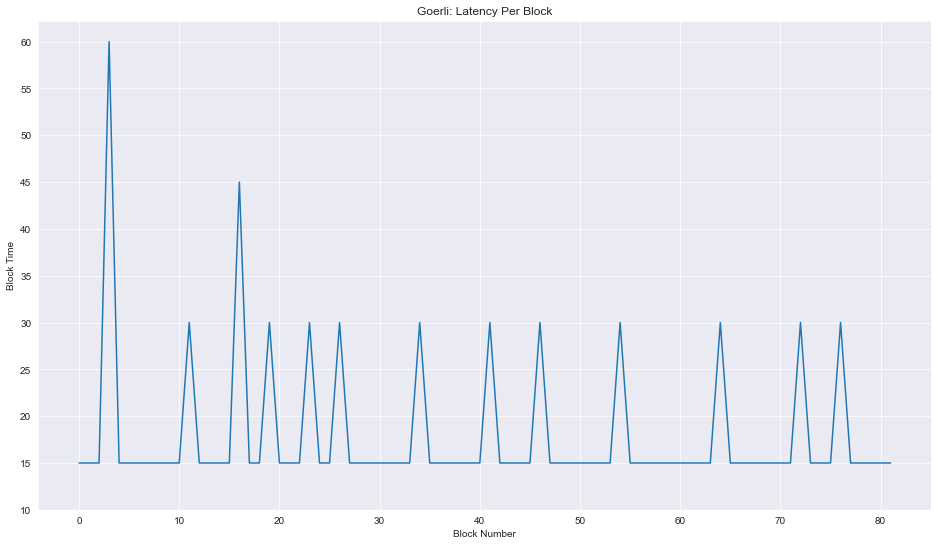

In [27]:
plt.subplots(figsize = (16, 9))
sns.set()
a = plt.plot(range(len(test1)),test1)
plt.yticks(range(10, 61, 5))
plt.ylabel('Block Time')
plt.xlabel('Block Number')
plt.title('Goerli: Latency Per Block')
plt.savefig('../Graphs/Goerli-Latency_line.png')
plt.show()

In [28]:
data

,Blockno,Time,From,To,TxnFee(ETH),Status,Method
3,6099690,0,0x6a09436f3cb7c3e871071033aba967327499b9d4,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000414,True,0x7818055e
4,6099691,15,0x6a09436f3cb7c3e871071033aba967327499b9d4,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000365,False,0x7818055e
5,6099692,30,0x6a09436f3cb7c3e871071033aba967327499b9d4,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000365,True,0x7818055e
6,6099693,45,0x6a09436f3cb7c3e871071033aba967327499b9d4,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000365,False,0x7818055e
7,6099697,105,0xa72e420605fd940b860c493263ce891d434782cb,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000421,True,0x7818055e
...,...,...,...,...,...,...,...
421,6099810,1800,0x6a09436f3cb7c3e871071033aba967327499b9d4,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000365,False,0x7818055e
422,6099810,1800,0x93e92a2bc0c66a2887ecf5c918fbbd622491ed23,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000395,True,0x7818055e
423,6099810,1800,0x138b9ebec6dcf3a5293fd6f5846ccbfe7a9e856a,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000418,True,0x7818055e
424,6099810,1800,0xa72e420605fd940b860c493263ce891d434782cb,0xe6440028008a67c52d1a9489252112228c1dcd8d,0.000369,True,0x7818055e


In [29]:
gas_usage = data[["TxnFee(ETH)", "Time"]]

In [30]:
gas_usage = gas_usage.reset_index()
gas_usage = gas_usage[["TxnFee(ETH)", "Time"]]
gas_usage

,TxnFee(ETH),Time
0,0.000414,0
1,0.000365,15
2,0.000365,30
3,0.000365,45
4,0.000421,105
...,...,...
418,0.000365,1800
419,0.000395,1800
420,0.000418,1800
421,0.000369,1800


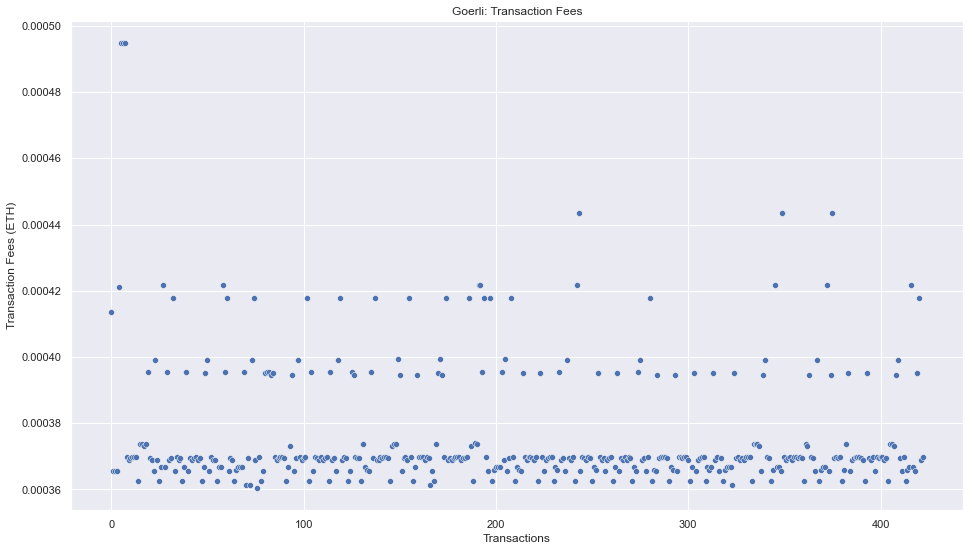

In [31]:
plt.subplots(figsize = (16, 9))
sns.scatterplot(x = gas_usage.index, y = gas_usage["TxnFee(ETH)"])
plt.xlabel('Transactions')
plt.ylabel('Transaction Fees (ETH)')
plt.title('Goerli: Transaction Fees')
plt.savefig('../Graphs/Goerli-Transaction_Fees.png')
plt.show()

In [45]:
num_requests_latency = [20 * x for x in range(11)]
num_requests_latency[0] = 5
average_latency = []
for num in num_requests_latency:
    average_latency.append(test1[:num].sum() / num)
average_latency

[24.0,
 20.25,
 18.75,
 18.25,
 18.0,
 14.7,
 12.25,
 10.5,
 9.1875,
 8.166666666666666,
 7.35]

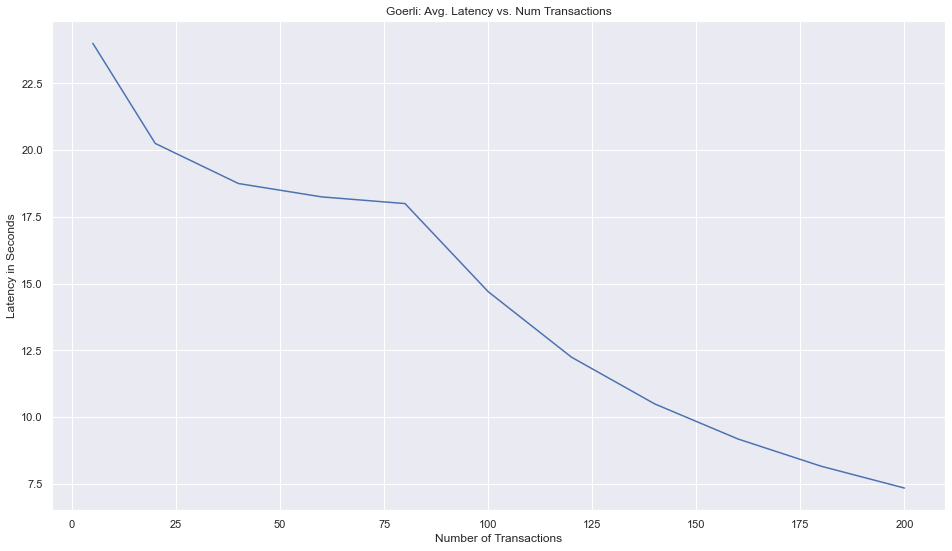

In [46]:
plt.subplots(figsize = (16, 9))
plt.plot(num_requests_latency, average_latency)
plt.xlabel('Number of Transactions')
plt.ylabel('Latency in Seconds')
plt.title('Goerli: Avg. Latency vs. Num Transactions')
plt.savefig('../Graphs/Goerli- Impact on Latency.png')
xticks
plt.show()